#	**Purchased Bike** **Classification Using  KNN & Random forest**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv("/content/sample_data/Bike.csv")

Data Preprocessing


In [38]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,Europe,36.0,Yes


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1000 non-null   int64  
 1   Marital Status  993 non-null    object 
 2   Gender          989 non-null    object 
 3   Income          994 non-null    float64
 4   Children        992 non-null    float64
 5   Education       1000 non-null   object 
 6   Occupation      1000 non-null   object 
 7   Home Owner      996 non-null    object 
 8   Cars            991 non-null    float64
 9   Region          1000 non-null   object 
 10  Age             992 non-null    float64
 11  Purchased Bike  1000 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 93.9+ KB


In [40]:
df.shape

(1000, 12)

In [41]:
df.nunique()

ID                1000
Marital Status       2
Gender               2
Income              16
Children             6
Education            5
Occupation           5
Home Owner           2
Cars                 5
Region               3
Age                 53
Purchased Bike       2
dtype: int64

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000.0,19965.992000,5347.333948,11000.0,15290.75,19744.0,24470.75,29447.0
Income,994.0,56267.605634,31067.817462,10000.0,30000.00,60000.0,70000.00,170000.0
Children,992.0,1.910282,1.626910,0.0,0.00,2.0,3.00,5.0
Cars,991.0,1.455096,1.121755,0.0,1.00,1.0,2.00,4.0
Age,992.0,44.181452,11.362007,25.0,35.00,43.0,52.00,89.0


In [43]:
df['Education'].value_counts()

Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: Education, dtype: int64

In [44]:
df.isnull().sum()

ID                 0
Marital Status     7
Gender            11
Income             6
Children           8
Education          0
Occupation         0
Home Owner         4
Cars               9
Region             0
Age                8
Purchased Bike     0
dtype: int64

In [45]:
df=df.fillna(df.mean())

<ipython-input-45-6f8c6f28e805>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


In [46]:
df['Marital Status']=df['Marital Status'].fillna(df['Marital Status'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Home Owner']=df['Home Owner'].fillna(df['Home Owner'].mode()[0])


In [47]:
df.isnull().sum()

ID                0
Marital Status    0
Gender            0
Income            0
Children          0
Education         0
Occupation        0
Home Owner        0
Cars              0
Region            0
Age               0
Purchased Bike    0
dtype: int64

<ipython-input-48-878280375a1b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr(),cmap='inferno')


<function matplotlib.pyplot.show(close=None, block=None)>

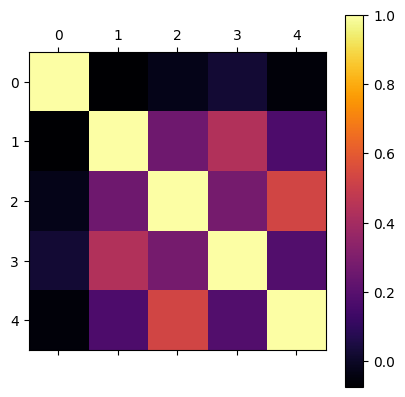

In [48]:
plt.matshow(df.corr(),cmap='inferno')
plt.colorbar()
plt.show

In [49]:
df.dtypes

ID                  int64
Marital Status     object
Gender             object
Income            float64
Children          float64
Education          object
Occupation         object
Home Owner         object
Cars              float64
Region             object
Age               float64
Purchased Bike     object
dtype: object

In [50]:
X =df.drop(columns=['Purchased Bike'])

Encoder Data not numeric

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Marital Status'] = le.fit_transform(X['Marital Status'])
X['Gender'] = le.fit_transform(X['Gender'])
X['Education'] = le.fit_transform(X['Education'])
X['Region'] = le.fit_transform(X['Region'])
X['Occupation'] = le.fit_transform(X['Occupation'])
X['Home Owner'] = le.fit_transform(X['Home Owner'])




In [52]:
X.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Region,Age
0,12496,0,0,40000.0,1.0,0,4,1,0.0,0,42.0
1,24107,0,1,30000.0,3.0,3,0,1,1.0,0,43.0
2,14177,0,1,80000.0,5.0,3,3,0,2.0,0,60.0
3,24381,1,1,70000.0,0.0,0,3,1,1.0,2,41.0
4,25597,1,1,30000.0,0.0,0,0,0,0.0,0,36.0


In [53]:
X.drop(columns=['ID'])

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Region,Age
0,0,0,40000.0,1.0,0,4,1,0.0,0,42.0
1,0,1,30000.0,3.0,3,0,1,1.0,0,43.0
2,0,1,80000.0,5.0,3,3,0,2.0,0,60.0
3,1,1,70000.0,0.0,0,3,1,1.0,2,41.0
4,1,1,30000.0,0.0,0,0,0,0.0,0,36.0
...,...,...,...,...,...,...,...,...,...,...
995,0,1,60000.0,2.0,2,3,1,2.0,1,54.0
996,1,1,70000.0,4.0,1,3,1,0.0,1,35.0
997,0,1,60000.0,2.0,0,4,1,0.0,1,38.0
998,1,1,100000.0,3.0,0,1,0,3.0,1,38.0


In [54]:
X=X.fillna(X.mean())

In [55]:
y=df['Purchased Bike']

In [56]:
y= le.fit_transform(y)

Split Dataset

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

Train Models on Data

In [59]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [60]:
kn=KNeighborsClassifier(n_neighbors=15)

In [61]:
kn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [62]:
pred_knn=kn.predict(X_test)

In [65]:
from sklearn import metrics

In [66]:
metrics.accuracy_score(y_test, pred_knn)

0.555

In [67]:
#Randon Forest
from sklearn.ensemble import RandomForestClassifier

In [68]:
rs=RandomForestClassifier(n_estimators=20)

In [69]:
rs.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [70]:
pred_rs=rs.predict(X_test)

In [71]:
metrics.accuracy_score(y_test,pred_rs)

0.725

In [75]:
from sklearn.metrics import classification_report

In [76]:
class_report_rs=classification_report(y_test,pred_rs)
class_report_kn=classification_report(y_test,pred_knn)

**Accuracy for** **Models**

In [77]:
print(class_report_rs)

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       106
           1       0.73      0.65      0.69        94

    accuracy                           0.73       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200



In [78]:
print(class_report_kn)

              precision    recall  f1-score   support

           0       0.58      0.57      0.57       106
           1       0.53      0.54      0.53        94

    accuracy                           0.56       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.56      0.56      0.56       200

